In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Population

In [2]:
pop_df = pd.read_csv('data/pop.csv')
pop_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,124M,125M,126M,126M,127M,128M,128M,129M,130M,130M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,139M,140M,142M,143M,144M,145M,147M,148M,149M,150M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.34M,1.32M,1.3M,1.29M,1.27M,1.25M,1.23M,1.22M,1.2M,1.18M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,52.8k,52.1k,51.5k,50.8k,50.2k,49.6k,49k,48.4k,47.8k,47.2k
4,UAE,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,24.1M,24.3M,24.5M,24.7M,25M,25.2M,25.4M,25.7M,25.9M,26.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,370k,372k,374k,375k,377k,378k,380k,381k,382k,384k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,107M,107M,107M,108M,108M,109M,109M,109M,110M,110M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,92.4M,92.6M,92.9M,93.1M,93.3M,93.5M,93.7M,93.9M,94.1M,94.3M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,61.1M,61.5M,61.9M,62.3M,62.7M,63.1M,63.4M,63.8M,64.1M,64.5M


In [3]:
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
    else:
        return value

    return float(value)

In [4]:
pop_df = pop_df[['country', '2021']]
pop_df.columns = ['country', 'population']
pop_df['population'] = pop_df['population'].apply(convert_to_number)
pop_df

C:\Users\prudh\AppData\Local\Temp\ipykernel_22932\2245820693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['population'] = pop_df['population'].apply(convert_to_number)


,country,population
0,Afghanistan,40000000.0
1,Angola,34500000.0
2,Albania,2850000.0
3,Andorra,78400.0
4,UAE,9790000.0
...,...,...
192,Samoa,214000.0
193,Yemen,37100000.0
194,South Africa,61500000.0
195,Zambia,19600000.0


In [5]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     197 non-null    object 
 1   population  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


# Income

In [6]:
income_df = pd.read_csv('data/gnicap_atm_con.csv')
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,UAE,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [7]:
income_df = income_df[['country', '2021']]
income_df.columns = ['country', 'gni_per_cap']
income_df

,country,gni_per_cap
0,Afghanistan,508
1,Angola,2090
2,Albania,5480
3,UAE,39.4k
4,Argentina,9500
...,...,...
186,Samoa,3700
187,Yemen,855
188,South Africa,6100
189,Zambia,1130


In [8]:
income_df['gni_per_cap'] = income_df['gni_per_cap'].apply(convert_to_number)

In [9]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      191 non-null    object 
 1   gni_per_cap  190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


# Emissions

In [10]:
emissions_df = pd.read_csv('data/CO2 Consumption emissions  1800 - 2022 - Dataset - v2 - Data source.csv', header=1)
emissions_df

,country,name,time,MtCo2 (Million Tons of CO2),tCO2 per cap (Tonnes of CO2 per Cap)
0,afg,Afghanistan,1800,0.002452,0.000748
1,afg,Afghanistan,1801,0.002460,0.000750
2,afg,Afghanistan,1802,0.002468,0.000752
3,afg,Afghanistan,1803,0.002476,0.000755
4,afg,Afghanistan,1804,0.002484,0.000757
...,...,...,...,...,...
43257,zwe,Zimbabwe,2018,12.497979,0.830310
43258,zwe,Zimbabwe,2019,12.026190,0.783230
43259,zwe,Zimbabwe,2020,11.550268,0.737110
43260,zwe,Zimbabwe,2021,12.614216,0.788708


In [11]:
emissions_df = emissions_df.query('time == 2021').reset_index(drop=True)
emissions_df = emissions_df[['name', 'MtCo2 (Million Tons of CO2)']]
emissions_df.columns = ['country', 'emissions']
emissions_df

,country,emissions
0,Afghanistan,11.177910
1,Angola,41.453173
2,Albania,6.062939
3,Andorra,0.471735
4,United Arab Emirates,193.927658
...,...,...
189,Samoa,0.306527
190,Yemen,12.769871
191,South Africa,301.549818
192,Zambia,8.093839


# Income levels

In [12]:
income_level_df = pd.merge(pop_df, income_df, on='country', how='inner')
income_level_df = pd.merge(income_level_df, emissions_df, on='country', how='inner')


print(set(emissions_df['country']) - set(income_level_df['country']))
print(set(pop_df['country']) - set(income_level_df['country']))
print(set(income_df['country']) - set(income_level_df['country']))

{'Andorra', 'United Arab Emirates', 'United States', 'Swaziland', 'Taiwan', 'United Kingdom', 'Macedonia, FYR', 'North Korea'}
{'UAE', 'Andorra', 'Holy See', 'North Macedonia', 'UK', 'Eswatini', 'USA', 'Monaco', 'San Marino', 'Taiwan', 'North Korea'}
{'UAE', 'North Macedonia', 'UK', 'Eswatini', 'USA'}


In [13]:
emissions_df['country'] = emissions_df['country'].str.replace('United States', 'USA')
emissions_df['country'] = emissions_df['country'].str.replace('United Kingdom', 'UK')
emissions_df['country'] = emissions_df['country'].str.replace('United Arab Emirates', 'UAE')
emissions_df['country'] = emissions_df['country'].str.replace('Macedonia, FYR', 'North Macedonia')

income_level_df = pd.merge(pop_df, income_df, on='country', how='inner')
income_level_df = pd.merge(income_level_df, emissions_df, on='country', how='inner')


print(set(emissions_df['country']) - set(income_level_df['country']))
print(set(pop_df['country']) - set(income_level_df['country']))
print(set(income_df['country']) - set(income_level_df['country']))

{'Swaziland', 'Taiwan', 'North Korea', 'Andorra'}
{'Holy See', 'Andorra', 'Eswatini', 'Monaco', 'Taiwan', 'San Marino', 'North Korea'}
{'Eswatini'}


In [14]:
income_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      190 non-null    object 
 1   population   190 non-null    float64
 2   gni_per_cap  189 non-null    float64
 3   emissions    190 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.1+ KB


In [15]:
income_level_df.iloc[income_level_df['gni_per_cap'][income_level_df['gni_per_cap'].isna()].index]

,country,population,gni_per_cap,emissions
100,Liechtenstein,39000.0,NaN,0.153461


In [16]:
null_index = income_level_df['gni_per_cap'][income_level_df['gni_per_cap'].isna()].index
income_level_df.loc[null_index, 'gni_per_cap'] = 166172
income_level_df.loc[null_index]

,country,population,gni_per_cap,emissions
100,Liechtenstein,39000.0,166172.0,0.153461


In [17]:
income_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      190 non-null    object 
 1   population   190 non-null    float64
 2   gni_per_cap  190 non-null    float64
 3   emissions    190 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.1+ KB


In [18]:
def classify_income_level(gni_per_capita):
    """
    Classifies the income level of a country based on GNI per capita.

    Parameters:
    gni_per_capita (float): Gross National Income per capita in USD.

    Returns:
    str: Income level classification.
    """
    if gni_per_capita <= 1045:
        return "Low-income"
    elif 1046 <= gni_per_capita <= 4095:
        return "Lower-middle-income"
    elif 4096 <= gni_per_capita <= 12695:
        return "Upper-middle-income"
    elif gni_per_capita >= 12696:
        return "High-income"
    else:
        return "Invalid income value"


In [19]:
income_level_df['income_level'] = income_level_df['gni_per_cap'].apply(classify_income_level)
income_level_df

,country,population,gni_per_cap,emissions,income_level
0,Afghanistan,40000000.0,508.0,11.177910,Low-income
1,Angola,34500000.0,2090.0,41.453173,Lower-middle-income
2,Albania,2850000.0,5480.0,6.062939,Upper-middle-income
3,UAE,9790000.0,39400.0,193.927658,High-income
4,Argentina,45300000.0,9500.0,170.756029,Upper-middle-income
...,...,...,...,...,...
185,Samoa,214000.0,3700.0,0.306527,Lower-middle-income
186,Yemen,37100000.0,855.0,12.769871,Low-income
187,South Africa,61500000.0,6100.0,301.549818,Upper-middle-income
188,Zambia,19600000.0,1130.0,8.093839,Lower-middle-income


In [20]:
income_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       190 non-null    object 
 1   population    190 non-null    float64
 2   gni_per_cap   190 non-null    float64
 3   emissions     190 non-null    float64
 4   income_level  190 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.6+ KB


In [21]:
df = income_level_df.copy()

# Calculate total emissions and total population
total_emissions = df['emissions'].sum()
total_population = df['population'].sum()

# Calculate share of emissions and population per income level
summary = df.groupby('income_level').agg(
    share_emissions=('emissions', lambda x: x.sum() / total_emissions * 100),
    share_population=('population', lambda x: x.sum() / total_population * 100)
).reset_index()

# Sorting the income levels for consistent plotting
income_levels = ['High-income', 'Upper-middle-income', 'Lower-middle-income', 'Low-income']
summary['income_level'] = pd.Categorical(summary['income_level'], categories=income_levels, ordered=True)
summary = summary.sort_values('income_level')

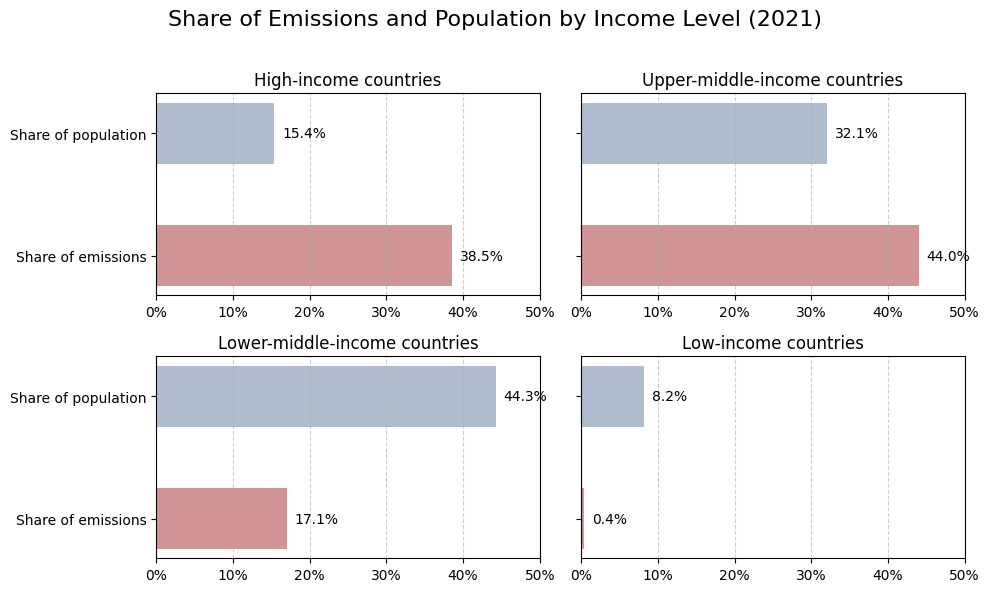

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)

# Mapping income levels to axes
for ax, (level, data) in zip(axes.flatten(), summary.iterrows()):
    # Add vertical grid lines first
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    # Plot bars with transparency
    ax.barh(['Share of emissions'], data['share_emissions'], color='brown', alpha=0.5, height=0.5, label='Share of emissions')
    ax.barh(['Share of population'], data['share_population'], color='#607d9f', alpha=0.5, height=0.5, label='Share of population')
    
    # Add values after bars
    ax.text(data['share_emissions'] + 1, 0, f"{data['share_emissions']:.1f}%", va='center', color='black', fontsize=10)
    ax.text(data['share_population'] + 1, 1, f"{data['share_population']:.1f}%", va='center', color='black', fontsize=10)
    
    ax.set_title(f"{data['income_level']} countries", fontsize=12)
    
    # Set x-axis limits and add % formatter
    ax.set_xlim(0, 50)
    ax.xaxis.set_major_formatter(PercentFormatter())

# Add overall titles and labels
fig.suptitle('Share of Emissions and Population by Income Level (2021)', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()